In [1]:
import os

# Set CUDA_LAUNCH_BLOCKING to 1
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Data Preparation

In [2]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
import cv2
import os
import numpy as np

# Updated MassachusettsBuildingsDataset with Albumentations and OpenCV
class MassachusettsBuildingsDataset(Dataset):
    def __init__(self, images_dir, transform=None, preprocessing=None):
        self.images_dir = images_dir
        self.masks_dir = images_dir + '_labels'
        self.transform = transform
        self.preprocessing = preprocessing
        
        self.images = [f for f in sorted(os.listdir(self.images_dir)) if f.endswith(('.tiff', '.tif'))]
        self.masks = [f for f in sorted(os.listdir(self.masks_dir)) if f.endswith(('.tiff', '.tif'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])
        
        # Read the image with OpenCV
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read as BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = image.astype(np.float32) / 255.0  # Normalize to [0, 1]

        # Read the mask with OpenCV
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        mask = mask.astype(np.float32) / 255.0  # Normalize to [0, 1]
        
        # Apply transformations
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
        
        # Apply preprocessing
        if self.preprocessing:
            preprocessed = self.preprocessing(image=image, mask=mask)
            image = preprocessed['image']
            mask = preprocessed['mask']
        
        # Expand the mask dimensions to add a channel dimension
        mask = mask.unsqueeze(dim=0)
        
        return image, mask

# Define transformations with Albumentations
train_transform = A.Compose([
    A.RandomCrop(height=256, width=256, always_apply=True),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    ToTensorV2()
])

val_transform = A.Compose([
    A.RandomCrop(height=256, width=256, always_apply=True),
    ToTensorV2()
])

# Apply these transformations to the dataset
train_dataset = MassachusettsBuildingsDataset(
    images_dir="/kaggle/input/massachusetts-buildings-dataset/tiff/train", 
    transform=train_transform
)

val_dataset = MassachusettsBuildingsDataset(
    images_dir="/kaggle/input/massachusetts-buildings-dataset/tiff/val", 
    transform=val_transform
)

test_dataset = MassachusettsBuildingsDataset(
    images_dir="/kaggle/input/massachusetts-buildings-dataset/tiff/test", 
    transform=val_transform
)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=2, shuffle=False, num_workers=4)
test_loader = DataLoader(dataset=test_dataset, batch_size=4, shuffle=False, num_workers=4)

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# Dataset Statistics

In [3]:
print(f'Training Dataset Length: {len(train_dataset)}')
print(f'Validation Dataset Length: {len(val_dataset)}')
print(f'Testing Dataset Length: {len(test_dataset)}')

Training Dataset Length: 137
Validation Dataset Length: 4
Testing Dataset Length: 10


# Data Value Inspection

In [4]:
import cv2
import numpy as np
import torch

'''Image=cv2.imread("/kaggle/input/massachusetts-buildings-dataset/png/train/22678915_15.png")
Mask=image=cv2.imread("/kaggle/input/massachusetts-buildings-dataset/png/train_labels/22678915_15.png")

print(f'Original mask shape:{Image.shape}')

print(f'Original mask shape:{Mask.shape}')'''

#print(np.unique(Mask))

image, mask = train_dataset[3]

print(f'Transformed Image shape:{image.shape}')
print(f'Transformed mask shape:{mask.shape}')

print(torch.unique(mask))
print(torch.unique(image))

print(torch.unique(mask).numel())



Transformed Image shape:torch.Size([3, 256, 256])
Transformed mask shape:torch.Size([1, 256, 256])
tensor([0., 1.])
tensor([0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314, 0.0353,
        0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667, 0.0706,
        0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020, 0.1059,
        0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373, 0.1412,
        0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725, 0.1765,
        0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078, 0.2118,
        0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431, 0.2471,
        0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784, 0.2824,
        0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137, 0.3176,
        0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490, 0.3529,
        0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843, 0.3882,
    

# Data Visualization

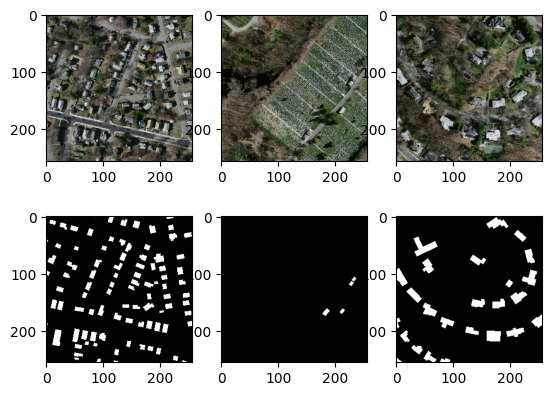

In [5]:
import matplotlib.pyplot as plt

for i in range(3):
    image, mask=train_dataset[i]
    plt.subplot(2,3,i+1)
    plt.imshow(image.permute(1,2,0),cmap='gray')
    plt.subplot(2,3,3+i+1)
    plt.imshow(mask.permute(1,2,0),cmap='gray')

plt.show()

In [ ]:
image, mask=train_dataset[i]
    plt.subplot(2,3,i+1)
    plt.imshow(image.permute(1,2,0),cmap='gray')
    plt.subplot(2,3,3+i+1)
    plt.imshow(mask.permute(1,2,0),cmap='gray')

# Boundary Edge Attention UNet

In [6]:
import torch
import torch.nn as nn

class BoundaryAttention(nn.Module):
    def __init__(self, in_channels):
        super(BoundaryAttention, self).__init__()
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=3, padding=1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        boundary_map = self.conv(x)
        boundary_attention = self.sigmoid(boundary_map)
        out = x * boundary_attention
        return out
    
class EdgeAttention(nn.Module):
    def __init__(self):
        super(EdgeAttention, self).__init__()
        self.sobel_x = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
        self.sobel_y = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
        sobel_x_filter = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32).view(1, 1, 3, 3)
        sobel_y_filter = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32).view(1, 1, 3, 3)
        self.sobel_x.weight = nn.Parameter(sobel_x_filter, requires_grad=False)
        self.sobel_y.weight = nn.Parameter(sobel_y_filter, requires_grad=False)
        
    def forward(self, x):
        edge_x = self.sobel_x(x)
        edge_y = self.sobel_y(x)
        edge_map = torch.sqrt(edge_x ** 2 + edge_y ** 2)
        edge_attention = torch.sigmoid(edge_map)
        return edge_attention

class UNetWithBoundaryEdgeAttention(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNetWithBoundaryEdgeAttention, self).__init__()
        
        # Encoder
        self.encoder1 = self.conv_block(in_channels, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        self.encoder4 = self.conv_block(256, 512)
        
        # Bottom
        self.bottom = self.conv_block(512, 1024)
        
        # Decoder
        self.upconv4 = self.upconv(1024, 512)
        self.upconv3 = self.upconv(512, 256)
        self.upconv2 = self.upconv(256, 128)
        self.upconv1 = self.upconv(128, 64)
        
        self.decoder4 = self.conv_block(1024, 512)
        self.decoder3 = self.conv_block(512, 256)
        self.decoder2 = self.conv_block(256, 128)
        self.decoder1 = self.conv_block(128, 64)
        
        # Final output
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)
        
        # Attention mechanisms
        self.boundary_attention = BoundaryAttention(512)
        self.edge_attention = EdgeAttention()
        
        # Maxpool
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def upconv(self, in_channels, out_channels):
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
    
    def forward(self, x):
        # Encoder
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.maxpool(enc1))
        enc3 = self.encoder3(self.maxpool(enc2))
        enc4 = self.encoder4(self.maxpool(enc3))
        
        # Boundary attention
        enc4_attention = self.boundary_attention(enc4)
        
        # Bottom
        bottom = self.bottom(self.maxpool(enc4_attention))
        
        # Decoder
        dec4 = self.upconv4(bottom)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)
        
        # Edge attention
        dec1_mean = torch.mean(dec1, dim=1, keepdim=True)  # Convert to grayscale
        edge_attention = self.edge_attention(dec1_mean)
        
        out = torch.sigmoid(self.final_conv(dec1 * edge_attention))
        
        return out


model = UNetWithBoundaryEdgeAttention()
test_input = torch.randn(8, 3, 256, 256)  # Batch size of 8, 3 channels, 256x256 images
output = model(test_input)
print(f"Output shape: {output.shape}")

Output shape: torch.Size([8, 1, 256, 256])


# Boundary Attention UNet

In [ ]:
import torch
import torch.nn as nn

class BoundaryAttention(nn.Module):
    def __init__(self, in_channels):
        super(BoundaryAttention, self).__init__()
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=3, padding=1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        boundary_map = self.conv(x)
        boundary_attention = self.sigmoid(boundary_map)
        out = x * boundary_attention
        return out

class UNetWithBoundaryAttention(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNetWithBoundaryAttention, self).__init__()
        
        # Encoder
        self.encoder1 = self.conv_block(in_channels, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        self.encoder4 = self.conv_block(256, 512)
        
        # Bottom
        self.bottom = self.conv_block(512, 1024)
        
        # Decoder
        self.upconv4 = self.upconv(1024, 512)
        self.upconv3 = self.upconv(512, 256)
        self.upconv2 = self.upconv(256, 128)
        self.upconv1 = self.upconv(128, 64)
        
        self.decoder4 = self.conv_block(1024, 512)
        self.decoder3 = self.conv_block(512, 256)
        self.decoder2 = self.conv_block(256, 128)
        self.decoder1 = self.conv_block(128, 64)
        
        # Final output
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)
        
        # Boundary attention mechanism
        self.boundary_attention = BoundaryAttention(512)
        
        # Maxpool
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def upconv(self, in_channels, out_channels):
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
    
    def forward(self, x):
        # Encoder
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.maxpool(enc1))
        enc3 = self.encoder3(self.maxpool(enc2))
        enc4 = self.encoder4(self.maxpool(enc3))
        
        # Boundary attention
        enc4_attention = self.boundary_attention(enc4)
        
        # Bottom
        bottom = self.bottom(self.maxpool(enc4_attention))
        
        # Decoder
        dec4 = self.upconv4(bottom)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)
        
        out = torch.sigmoid(self.final_conv(dec1))
        
        return out


model = UNetWithBoundaryAttention()
test_input = torch.randn(8, 3, 256, 256)  # Batch size of 8, 3 channels, 256x256 images
output = model(test_input)
print(f"Output shape: {output.shape}")

# Dice Loss

In [7]:
import torch
import torch.nn as nn

class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
      
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        
        # Flatten the inputs and targets for easier computation
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        # Compute the intersection and union
        intersection = (inputs * targets).sum()
        dice_score = (2. * intersection + self.smooth) / (inputs.sum() + targets.sum() + self.smooth)
        
        # Dice Loss is 1 - Dice Coefficient
        return 1 - dice_score

# Training Loop 

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cuda'):
    model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        train_iou_sum = 0
        train_samples = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)  # No sigmoid here
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # Debug prints
            print("Output min:", outputs.min().item(), "Output max:", outputs.max().item())
            print("Labels min:", labels.min().item(), "Labels max:", labels.max().item())
            
            running_train_loss += loss.item() * inputs.size(0)
            train_iou_sum += calculate_iou(outputs, labels, device) * inputs.size(0)
            train_samples += inputs.size(0)
        
        epoch_train_loss = running_train_loss / train_samples
        epoch_train_iou = train_iou_sum / train_samples
        
        model.eval()
        running_val_loss = 0.0
        val_iou_sum = 0
        val_samples = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                running_val_loss += loss.item() * inputs.size(0)
                val_iou_sum += calculate_iou(outputs, labels, device) * inputs.size(0)
                val_samples += inputs.size(0)
        
        epoch_val_loss = running_val_loss / val_samples
        epoch_val_iou = val_iou_sum / val_samples
        
        print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f} | Train IoU: {epoch_train_iou:.4f}, Val IoU: {epoch_val_iou:.4f}')
        
        
def calculate_iou(outputs, labels, device='cuda', threshold=0.5):
    # No sigmoid if using BCEWithLogitsLoss
    predictions = (outputs > threshold).float().to(device)  # Apply threshold to get binary mask
    
    predictions = predictions.view(-1)
    labels = labels.view(-1)
    
    intersection = torch.sum(predictions * labels)
    union = torch.sum(predictions) + torch.sum(labels) - intersection
    
    union = torch.clamp(union, min=1e-6)
    
    iou = intersection / union
    return iou

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# model = smp.Unet(
#     encoder_name="resnet101",        # choose encoder, e.g. resnet50, efficientnet-b7, etc.
#     encoder_weights="imagenet",     # use `imagenet` pre-trained weights for the encoder
#     in_channels=3,                  # model input channels (1 for grayscale, 3 for RGB)
#     classes=1                       # model output channels (1 for binary segmentation)
# ).to(device)

#model = UNet().to(device)
#model = AttentionUNet().to(device)
#model = ResUNet().to(device)
#model = SegNet().to(device)
#model = ResAttentionUNet().to(device)
#model = ResAttentionUNet34().to(device)
#model = NestedUNet().to(device)
#model = NestedUNet_Attention().to(device)
#model = UNetWithBoundaryEdgeAttention().to(device)
model = UNetWithBoundaryAttention().to(device)
criterion = nn.BCELoss()
#criterion = DiceLoss()
#criterion = FocalLoss()
#criterion = DiceFocalLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=200, device=device)

Output min: 0.10668586194515228 Output max: 0.854189395904541
Labels min: 0.0 Labels max: 1.0
Output min: 0.14090006053447723 Output max: 0.8776246905326843
Labels min: 0.0 Labels max: 1.0
Output min: 0.13825634121894836 Output max: 0.861615002155304
Labels min: 0.0 Labels max: 1.0
Output min: 0.13041643798351288 Output max: 0.8815913796424866
Labels min: 0.0 Labels max: 1.0
Output min: 0.0853792056441307 Output max: 0.9222251772880554
Labels min: 0.0 Labels max: 1.0
Output min: 0.1784285306930542 Output max: 0.8640742897987366
Labels min: 0.0 Labels max: 1.0
Output min: 0.17574842274188995 Output max: 0.8743441104888916
Labels min: 0.0 Labels max: 1.0
Output min: 0.13602134585380554 Output max: 0.8639151453971863
Labels min: 0.0 Labels max: 1.0
Output min: 0.15395191311836243 Output max: 0.8854215741157532
Labels min: 0.0 Labels max: 1.0
Output min: 0.16677625477313995 Output max: 0.9251952171325684
Labels min: 0.0 Labels max: 1.0
Output min: 0.14986470341682434 Output max: 0.92035979

/usr/local/src/pytorch/aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [256,0,0], thread: [64,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [256,0,0], thread: [65,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [256,0,0], thread: [66,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [256,0,0], thread: [67,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [256,0,0], thread: [68,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [256,0,0], thread: [69,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/usr

RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


# Testing Loop

In [ ]:
def test_model(model, test_loader, criterion, device='cuda', threshold=0.5):
    model.eval()  # Set the model to evaluation mode
    running_test_loss = 0.0
    test_iou_sum = 0
    test_samples = 0
    
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_test_loss += loss.item() * inputs.size(0)
            test_iou_sum += calculate_iou(outputs, labels, device, threshold) * inputs.size(0)
            test_samples += inputs.size(0)
    
    avg_test_loss = running_test_loss / test_samples
    avg_test_iou = test_iou_sum / test_samples
    
    print(f'Test Loss: {avg_test_loss:.4f} | Test IoU: {avg_test_iou:.4f}')
    #return avg_test_loss, avg_test_iou

# After training, run the test loop
test_model(model, test_loader, criterion, device=device, threshold=0.5)

# Test Data Prediction Visualization

In [ ]:
import matplotlib.pyplot as plt

# Set the size of the entire figure; adjust the width and height as needed
plt.figure(figsize=(15, 30))  # Increase the size for better visibility

for i in range(10):
    image, mask = test_dataset[i]
    image, mask = image.unsqueeze(dim=0), mask.unsqueeze(dim=0)
    image, mask = image.to(device), mask.to(device)
    
    # Get model prediction
    prediction = model(image)
    prediction = (prediction > 0.5).float()
    
    # Detach the prediction from the graph and move it to the CPU
    image = image.squeeze().detach().cpu()
    prediction = prediction.squeeze().detach().cpu()
    mask = mask.squeeze().detach().cpu()
    
#     # Print shapes for debugging
#     print(f"Image {i+1} shape: {image.shape}")
#     print(f"Prediction {i+1} shape: {prediction.shape}")
#     print(f"Mask {i+1} shape: {mask.shape}")
    
#     # Print unique values in prediction to verify binary output
#     print(f"Unique values in Prediction {i+1}: {torch.unique(prediction)}")
    
    # Plot the image
    plt.subplot(10, 3, 3*i+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f'Image {i+1}')
    plt.axis('off')
    
    # Plot the predicted segmentation
    plt.subplot(10, 3, 3*i+2)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')
    
    # Plot the ground truth mask
    plt.subplot(10, 3, 3*i+3)  # Corrected the index from `3*(i+1)` to `3*i+3`
    plt.imshow(prediction, cmap='gray')
    plt.title(f'Prediction {i+1}')
    plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()